In [1]:
import numpy as np
import pandas as pd

In [2]:
import transformers

In [105]:
def calculate_f1_score(actual_keyphrases, predicted_keyphrases):
    actual_set = set([s.lower() for s in actual_keyphrases])
    predicted_set = set(s.lower() for s in predicted_keyphrases)

    true_positives = len(actual_set.intersection(predicted_set))
    precision = true_positives / len(predicted_set) if predicted_set else 0
    recall = true_positives / len(actual_set) if actual_set else 0

    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    # print(f"Precision: {precision} \t Reacll: {recall} \t F1 Score: {f1_score}")
    return precision, recall, f1_score


actual_keyphrases = ['keyphrase one', 'keyphrase two', 'keyphrase three']
predicted_keyphrases = ['keyphrase one', 'keyphrase four', 'keyphrase two']
p,r,f1_score = calculate_f1_score(actual_keyphrases, predicted_keyphrases)
print(f"F1 Score: {f1_score}")

F1 Score: 0.6666666666666666


In [143]:
def convert_to_unigrams(keyphrases):
    """Convert a list of keyphrases to a set of unigrams."""
    return set(unigram for keyphrase in keyphrases for unigram in keyphrase.split())

def partial_f1_score(gold_keyphrases, extracted_keyphrases):
    """Calculate the F1 score for partial matches between two lists of keyphrases."""
    gold_unigrams = convert_to_unigrams(gold_keyphrases)
    extracted_unigrams = convert_to_unigrams(extracted_keyphrases)

    true_positives = len(gold_unigrams.intersection(extracted_unigrams))
    false_positives = len(extracted_unigrams - gold_unigrams)
    false_negatives = len(gold_unigrams - extracted_unigrams)

    if true_positives == 0:
        return 0,0,0  # Return 0 to avoid division by zero if there are no true positives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1_score

# Example usage
gold_keyphrases = ['machine learning', 'deep learning', 'neural networks']
extracted_keyphrases = ['learning in machines', 'networks', 'deep neural learning']

precision,recall,f1_score = partial_f1_score(gold_keyphrases, extracted_keyphrases)
# print(f"F1 Score for partial match: {f1_score}")
print(f"Precision: {precision} \t Reacll: {recall} \t F1 Score for partial match: {f1_score}")

Precision: 0.6666666666666666 	 Reacll: 0.8 	 F1 Score for partial match: 0.7272727272727272


In [117]:
precision,recall,f1_score = partial_f1_score(df['true'][1], df['preds'][1])
print(precision, recall, f1_score)

0.5294117647058824 0.6923076923076923 0.5999999999999999


In [113]:
for i in range(len(df)):
    try:
        precision,recall,f1_score = partial_f1_score(df['true'], df['preds'])
    except:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
from datasets import load_dataset

dataset = load_dataset("taln-ls2n/inspec")

/Users/nishanthkrishna/miniforge3/envs/nlp/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for taln-ls2n/inspec contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/taln-ls2n/inspec
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [4]:
df = pd.DataFrame(dataset['train'])

In [160]:
test_df = pd.DataFrame(dataset['test'])
validation_df = pd.DataFrame(dataset['validation'])

In [7]:
def lowercase(my_list):
    return [i.lower() for i in my_list]

In [8]:
df['abstract'] = df['abstract'].apply(lambda x: x.lower())
df['keyphrases'] = df['keyphrases'].apply(lowercase)

In [9]:
df

,id,title,abstract,keyphrases,prmu
0,761,Towards a NMR implementation of a quantum latt...,recent theoretical results suggest that an arr...,"[nmr implementation, quantum lattice gas algor...","[P, P, P, P, P, P, P, M]"
1,724,Banking on SMA funds [separately managed accou...,from investment management to technology to ba...,"[separately managed accounts, investment manag...","[P, P, P, P, P, P]"
2,1371,Design methodology for diagnostic strategies f...,this paper presents a method for the construct...,"[design methodology, diagnostic strategies, in...","[P, P, P, P, P]"
3,1334,A shy invariant of graphs,moving from a well known result of p.l. hammer...,"[graph invariant, induced odd cycles, minimum ...","[P, P, P, P, P, P]"
4,1419,PacketVideo. One step ahead of the streaming w...,"go beyond the hype, however, and it's clear th...","[packetvideo, wireless devices, mpeg-4, wirele...","[P, P, P, P, P, P, P, R]"
...,...,...,...,...,...
995,1124,Data extraction from the Web based on pre-defi...,"with the development of the internet, the worl...","[data extraction, schema, internet, informatio...","[P, P, P, P, P, R, M, U, U]"
996,118,Sensorless control of induction motor drives,controlled induction motor drives without mech...,"[sensorless control, induction motor drives, r...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ..."
997,635,Detection and estimation of abrupt changes in ...,detection of change-points in normal means is ...,"[generalized likelihood ratio test statistic, ...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ..."
998,1260,A dataflow computer which accelerates executio...,"in the dataflow machine, it is important to av...","[dataflow computer, sequential programs, prece...","[P, P, P, P, P, P, P, P, P, R, M, M]"


In [10]:
# Model parameters
from transformers import (
    Text2TextGenerationPipeline,
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
)


class KeyphraseGenerationPipeline(Text2TextGenerationPipeline):
    def __init__(self, model, keyphrase_sep_token=";", *args, **kwargs):
        super().__init__(
            model=AutoModelForSeq2SeqLM.from_pretrained(model),
            tokenizer=AutoTokenizer.from_pretrained(model),
            *args,
            **kwargs
        )
        self.keyphrase_sep_token = keyphrase_sep_token

    def postprocess(self, model_outputs):
        results = super().postprocess(
            model_outputs=model_outputs
        )
        return [[keyphrase.strip() for keyphrase in result.get("generated_text").split(self.keyphrase_sep_token) if keyphrase != ""] for result in results]


In [11]:
# Load pipeline
model_name = "ml6team/keyphrase-generation-t5-small-inspec"
generator = KeyphraseGenerationPipeline(model=model_name)

In [49]:
text = df['abstract'][0]

keyphrases = generator(text)

print(keyphrases)

/Users/nishanthkrishna/miniforge3/envs/nlp/lib/python3.10/site-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[['quantum information processors', 'fluid dynamics problems', 'quantum lattice-gas algorithms']]


In [254]:
import spacy
from keybert import KeyBERT

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample text
# text = "The quick brown fox jumps over the lazy dog. It barked and played in the garden."

# Process the text with spaCy for POS tagging
doc = nlp(text)

# Filter words based on POS tags
# categories = ['NOUN', 'PROPN', 'VERB', 'ADJ']
# filtered_text = " ".join([token.text for token in doc if token.pos_ in categories])

# Now, use KeyBERT to extract keywords from the filtered text
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=100)

# Print all extracted keywords and their scores
all_words = [word for word,_ in keywords if _>0]
keywords_score_dict = {}
for word, score in keywords:
    if score>0:
        print(f"{word}: {score}")
        keywords_score_dict[word]=score

qubit: 0.3605
quantum: 0.3381
nmr: 0.3305
lattice: 0.2493
diffusion: 0.2144
processors: 0.2031
dynamics: 0.2009
simulation: 0.187
density: 0.1866
ensemble: 0.1732
gas: 0.1584
algorithms: 0.153
implementation: 0.1522
pulse: 0.1501
magnetic: 0.1438
architectures: 0.142
qlga: 0.1381
resonance: 0.1371
algorithm: 0.1349
steps: 0.1305
encode: 0.1301
nonlinear: 0.1273
through: 0.1246
fluid: 0.1196
channels: 0.1072
via: 0.0968
nuclear: 0.0946
initial: 0.0865
communicating: 0.0802
burgers: 0.0801
classical: 0.0785
information: 0.0746
array: 0.0745
follow: 0.0654
techniques: 0.0615
first: 0.061
theoretical: 0.058
progress: 0.0565
qualitatively: 0.0538
running: 0.0533
been: 0.0529
recent: 0.05
have: 0.0479
observed: 0.0463
in: 0.046
equations: 0.0453
solves: 0.0452
an: 0.0447
mass: 0.0321
then: 0.0262
the: 0.0233
describe: 0.0229
evolved: 0.0168
improved: 0.0163
two: 0.0163
methods: 0.0126
suggest: 0.0104
shown: 0.0099
manipulated: 0.0071
experimental: 0.0067
on: 0.0052
control: 0.0046


In [51]:
sorted(all_words)

['algorithm',
 'algorithms',
 'an',
 'architectures',
 'array',
 'been',
 'burgers',
 'channels',
 'classical',
 'communicating',
 'control',
 'density',
 'describe',
 'diffusion',
 'dynamics',
 'encode',
 'ensemble',
 'equations',
 'evolved',
 'experimental',
 'first',
 'fluid',
 'follow',
 'gas',
 'have',
 'implementation',
 'improved',
 'in',
 'information',
 'initial',
 'lattice',
 'magnetic',
 'manipulated',
 'mass',
 'methods',
 'nmr',
 'nonlinear',
 'nuclear',
 'observed',
 'on',
 'processors',
 'progress',
 'pulse',
 'qlga',
 'qualitatively',
 'quantum',
 'qubit',
 'recent',
 'resonance',
 'running',
 'shown',
 'simulation',
 'solves',
 'steps',
 'suggest',
 'techniques',
 'the',
 'then',
 'theoretical',
 'through',
 'two',
 'via']

In [52]:
true_values = []
for i in df['keyphrases'][0]:
    true_values += i.split(" ")
true_values = list(set(true_values))
true_values

['magnetic',
 'lattice',
 'resonance',
 'processors',
 'quantum',
 'two-qubit',
 'nmr',
 'equations',
 'equation',
 'nonlinear',
 'information',
 'algorithm',
 'problems',
 'nuclear',
 'burgers',
 'dynamics',
 'implementation',
 'information.processors',
 'fluid',
 'gas',
 'diffusion']

In [53]:
calculate_f1_score(true_values, all_words)

Precision: 0.27419354838709675 	 Reacll: 0.8095238095238095 	 F1 Score: 0.4096385542168674


0.4096385542168674

In [54]:
def get_sequential_tokens(doc, interested_pos, lower):
    # to get sequential tokens from the text
    sentences = []
    for sent in doc.sents:
        selected_words = []
        for token in sent:
            if token.pos_ in interested_pos:
                if lower:
                    selected_words.append(token.text.lower())
                else:
                    selected_words.append(token.text)
            else:
                selected_words.append("*")
        sentences.append(selected_words)
    return sentences

def get_n_grams(sentences):
    # to get n_grams outta sequential tokens
    n_grams = []
    for sent in sentences:
        temp_list = []
        for word in sent:
            if word == '*':
                if len(temp_list)!=0:
                    n_grams.append(temp_list)
                    temp_list = []
            else:
                temp_list.append(word)
    return n_grams

In [55]:
def find_longest_sequence_and_scores(n_grams, unigrams, keywords_score_dict):
    longest_sequences = []
    
    for n_gram in n_grams:
        current_sequence = []
        longest_sequence = []
        
        for word in n_gram:
            if word in unigrams:
                current_sequence.append(word)
                if len(current_sequence) > len(longest_sequence):
                    longest_sequence = current_sequence.copy()
            else:
                current_sequence = []
        
        if len(longest_sequence)>0:
            longest_sequences.append(longest_sequence)
    
    longest_sequences = [' '.join(i) for i in sorted(longest_sequences, key=len, reverse=True)]

    final_scores = {}
    for seq in longest_sequences:
        score = 0
        for word in seq.split(" "):
            score += keywords_score_dict[word]
        final_scores[seq] = score
    
    return longest_sequences, final_scores

In [56]:
def lemmed(my_list):
    lemmed_list = []
    for seq in my_list:
        lemmed_list.append(' '.join([token.lemma_ for token in nlp(seq)]))
    return lemmed_list

In [57]:
interested_pos = ['NOUN', 'PROPN', 'VERB', 'ADJ']

In [58]:
doc = nlp(df['abstract'][0].replace('-',' '))

In [59]:
doc

recent theoretical results suggest that an array of quantum information processors communicating via classical channels can be used to solve fluid dynamics problems. quantum lattice gas algorithms (qlga) running on such architectures have been shown to solve the diffusion equation and the nonlinear burgers equations. in this report, we describe progress towards an ensemble nuclear magnetic resonance (nmr) implementation of a qlga that solves the diffusion equation. the methods rely on nmr techniques to encode an initial mass density into an ensemble of two qubit quantum information processors. using standard pulse techniques, the mass density can then manipulated and evolved through the steps of the algorithm. we provide the experimental results of our first attempt to realize the nmr implementation. the results qualitatively follow the ideal simulation, but the observed implementation errors highlight the need for improved control

In [60]:
sents = get_sequential_tokens(doc, interested_pos, lower=False)
n_grams = get_n_grams(sents)

In [61]:
n_grams

[['recent', 'theoretical', 'results', 'suggest'],
 ['array'],
 ['quantum', 'information', 'processors', 'communicating'],
 ['classical', 'channels'],
 ['used'],
 ['solve', 'fluid', 'dynamics', 'problems'],
 ['quantum', 'lattice', 'gas', 'algorithms'],
 ['qlga'],
 ['running'],
 ['such', 'architectures'],
 ['shown'],
 ['solve'],
 ['diffusion', 'equation'],
 ['nonlinear', 'burgers', 'equations'],
 ['report'],
 ['describe', 'progress'],
 ['ensemble', 'nuclear', 'magnetic', 'resonance'],
 ['nmr'],
 ['implementation'],
 ['qlga'],
 ['solves'],
 ['diffusion', 'equation'],
 ['methods', 'rely'],
 ['nmr', 'techniques'],
 ['encode'],
 ['initial', 'mass', 'density'],
 ['ensemble'],
 ['qubit', 'quantum', 'information', 'processors'],
 ['using', 'standard', 'pulse', 'techniques'],
 ['mass', 'density'],
 ['manipulated'],
 ['evolved'],
 ['steps'],
 ['algorithm'],
 ['provide'],
 ['experimental', 'results'],
 ['first', 'attempt'],
 ['realize'],
 ['nmr', 'implementation'],
 ['results'],
 ['follow'],
 ['id

In [62]:
sorted(all_words)

['algorithm',
 'algorithms',
 'an',
 'architectures',
 'array',
 'been',
 'burgers',
 'channels',
 'classical',
 'communicating',
 'control',
 'density',
 'describe',
 'diffusion',
 'dynamics',
 'encode',
 'ensemble',
 'equations',
 'evolved',
 'experimental',
 'first',
 'fluid',
 'follow',
 'gas',
 'have',
 'implementation',
 'improved',
 'in',
 'information',
 'initial',
 'lattice',
 'magnetic',
 'manipulated',
 'mass',
 'methods',
 'nmr',
 'nonlinear',
 'nuclear',
 'observed',
 'on',
 'processors',
 'progress',
 'pulse',
 'qlga',
 'qualitatively',
 'quantum',
 'qubit',
 'recent',
 'resonance',
 'running',
 'shown',
 'simulation',
 'solves',
 'steps',
 'suggest',
 'techniques',
 'the',
 'then',
 'theoretical',
 'through',
 'two',
 'via']

In [63]:
res, scores = find_longest_sequence_and_scores(n_grams, all_words, keywords_score_dict)
res

['quantum information processors communicating',
 'quantum lattice gas algorithms',
 'ensemble nuclear magnetic resonance',
 'qubit quantum information processors',
 'nonlinear burgers equations',
 'initial mass density',
 'recent theoretical',
 'classical channels',
 'fluid dynamics',
 'describe progress',
 'nmr techniques',
 'pulse techniques',
 'mass density',
 'nmr implementation',
 'observed implementation',
 'array',
 'qlga',
 'running',
 'architectures',
 'shown',
 'diffusion',
 'nmr',
 'implementation',
 'qlga',
 'solves',
 'diffusion',
 'methods',
 'encode',
 'ensemble',
 'manipulated',
 'evolved',
 'steps',
 'algorithm',
 'experimental',
 'first',
 'follow',
 'simulation']

In [64]:
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
scores

{'qubit quantum information processors': 0.9763,
 'quantum lattice gas algorithms': 0.8988,
 'quantum information processors communicating': 0.696,
 'ensemble nuclear magnetic resonance': 0.5487,
 'nmr implementation': 0.4827,
 'nmr techniques': 0.392,
 'nmr': 0.3305,
 'fluid dynamics': 0.3205,
 'initial mass density': 0.30519999999999997,
 'nonlinear burgers equations': 0.2527,
 'mass density': 0.21869999999999998,
 'diffusion': 0.2144,
 'pulse techniques': 0.2116,
 'observed implementation': 0.1985,
 'simulation': 0.187,
 'classical channels': 0.1857,
 'ensemble': 0.1732,
 'implementation': 0.1522,
 'architectures': 0.142,
 'qlga': 0.1381,
 'algorithm': 0.1349,
 'steps': 0.1305,
 'encode': 0.1301,
 'recent theoretical': 0.10800000000000001,
 'describe progress': 0.0794,
 'array': 0.0745,
 'follow': 0.0654,
 'first': 0.061,
 'running': 0.0533,
 'solves': 0.0452,
 'evolved': 0.0168,
 'methods': 0.0126,
 'shown': 0.0099,
 'manipulated': 0.0071,
 'experimental': 0.0067}

In [65]:
final_res = list(scores.keys())[:10]

In [66]:
final_res

['qubit quantum information processors',
 'quantum lattice gas algorithms',
 'quantum information processors communicating',
 'ensemble nuclear magnetic resonance',
 'nmr implementation',
 'nmr techniques',
 'nmr',
 'fluid dynamics',
 'initial mass density',
 'nonlinear burgers equations']

In [67]:
df['keyphrases'][0]

['nmr implementation',
 'quantum lattice gas algorithm',
 'quantum information processors',
 'fluid dynamics problems',
 'diffusion equation',
 'nonlinear burgers equations',
 'nuclear magnetic resonance',
 'two-qubit quantum information.processors']

In [68]:
calculate_f1_score(lemmed(df['keyphrases'][0]),lemmed(final_res) )

Precision: 0.3 	 Reacll: 0.375 	 F1 Score: 0.33333333333333326


0.33333333333333326

In [69]:
partial_f1_score(lemmed(df['keyphrases'][0]),lemmed(final_res) )

0.7555555555555555

In [32]:
df

,id,title,abstract,keyphrases,prmu
0,761,Towards a NMR implementation of a quantum latt...,recent theoretical results suggest that an arr...,"[nmr implementation, quantum lattice gas algor...","[P, P, P, P, P, P, P, M]"
1,724,Banking on SMA funds [separately managed accou...,from investment management to technology to ba...,"[separately managed accounts, investment manag...","[P, P, P, P, P, P]"
2,1371,Design methodology for diagnostic strategies f...,this paper presents a method for the construct...,"[design methodology, diagnostic strategies, in...","[P, P, P, P, P]"
3,1334,A shy invariant of graphs,moving from a well known result of p.l. hammer...,"[graph invariant, induced odd cycles, minimum ...","[P, P, P, P, P, P]"
4,1419,PacketVideo. One step ahead of the streaming w...,"go beyond the hype, however, and it's clear th...","[packetvideo, wireless devices, mpeg-4, wirele...","[P, P, P, P, P, P, P, R]"
...,...,...,...,...,...
995,1124,Data extraction from the Web based on pre-defi...,"with the development of the internet, the worl...","[data extraction, schema, internet, informatio...","[P, P, P, P, P, R, M, U, U]"
996,118,Sensorless control of induction motor drives,controlled induction motor drives without mech...,"[sensorless control, induction motor drives, r...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ..."
997,635,Detection and estimation of abrupt changes in ...,detection of change-points in normal means is ...,"[generalized likelihood ratio test statistic, ...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ..."
998,1260,A dataflow computer which accelerates executio...,"in the dataflow machine, it is important to av...","[dataflow computer, sequential programs, prece...","[P, P, P, P, P, P, P, P, P, R, M, M]"


In [367]:
def extract(text, number=20):
    def get_sequential_tokens(doc, interested_pos, lower):
        # to get sequential tokens from the text
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                if token.pos_ in interested_pos:
                    if lower:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
                else:
                    selected_words.append("*")
            sentences.append(selected_words)
        return sentences
    
    def get_n_grams(sentences):
        # to get n_grams outta sequential tokens
        n_grams = []
        for sent in sentences:
            temp_list = []
            for word in sent:
                if word == '*':
                    if len(temp_list)!=0:
                        n_grams.append(temp_list)
                        temp_list = []
                else:
                    temp_list.append(word)
        return n_grams
        
    def find_longest_sequence_and_scores(n_grams, unigrams, keywords_score_dict):
        longest_sequences = []
        
        for n_gram in n_grams:
            current_sequence = []
            longest_sequence = []
            
            for word in n_gram:
                if word in unigrams:
                    current_sequence.append(word)
                    if len(current_sequence) > len(longest_sequence):
                        longest_sequence = current_sequence.copy()
                else:
                    current_sequence = []
            
            if len(longest_sequence)>0:
                longest_sequences.append(longest_sequence)
        
        longest_sequences = [' '.join(i) for i in sorted(longest_sequences, key=len, reverse=True)]
    
        final_scores = {}
        for seq in longest_sequences:
            score = 0
            for word in seq.split(" "):
                score += keywords_score_dict[word]
            final_scores[seq] = score
        
        return longest_sequences, final_scores
    
    def lemmed(my_list):
        lemmed_list = []
        for seq in my_list:
            lemmed_list.append(' '.join([token.lemma_ for token in nlp(seq)]))
        return lemmed_list

    # ------------------------------------------------------------------------------------------------------------------------

    scores_list = []
    nlp = spacy.load("en_core_web_sm")
    spacy_text = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in spacy_text])
    doc = nlp(spacy_text)
    
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=100)
    
    all_words = [word for word,_ in keywords if _>0]
    keywords_score_dict = {}
    for word, score in keywords:
        if score>0:
            # print(f"{word}: {score}")
            keywords_score_dict[word]=score
    
    interested_pos = ['NOUN', 'PROPN', 'VERB', 'ADJ']
    sents = get_sequential_tokens(doc, interested_pos, lower=False)
    n_grams = get_n_grams(sents)

    res, scores = find_longest_sequence_and_scores(n_grams, all_words, keywords_score_dict)
    scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
    
    final_res = list(scores.keys())[:number]
    scores_list.append(scores)
    
    return pd.Series([lemmed(final_res), scores_list])

In [368]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

# Assuming 'lemmed' and 'extract' are your functions for lemmatization and keyphrase extraction.
# And assuming 'df' is your DataFrame with columns 'keyphrases' and 'abstract'.

# Apply the 'lemmed' function to the 'keyphrases' column with a progress bar
df['true'] = df['keyphrases'].progress_apply(lemmed)

# Apply the 'extract' function to the 'abstract' column with a progress bar
# df['preds'] = df['abstract'].progress_apply(extract)
df[['preds', 'scores']] = df['abstract'].progress_apply(lambda x: extract(x)).apply(pd.Series)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [369]:
df

,id,title,abstract,keyphrases,prmu,true,preds,scores
0,761,Towards a NMR implementation of a quantum latt...,recent theoretical results suggest that an arr...,"[nmr implementation, quantum lattice gas algor...","[P, P, P, P, P, P, P, M]","[nmr implementation, quantum lattice gas algor...","[qubit quantum information processor, quantum ...",[{'qubit quantum information processors': 0.97...
1,724,Banking on SMA funds [separately managed accou...,from investment management to technology to ba...,"[separately managed accounts, investment manag...","[P, P, P, P, P, P]","[separately manage account, investment managem...","[sma business, small bank, outsourcer, office ...","[{'sma business': 0.8077000000000001, 'small b..."
2,1371,Design methodology for diagnostic strategies f...,this paper presents a method for the construct...,"[design methodology, diagnostic strategies, in...","[P, P, P, P, P]","[design methodology, diagnostic strategy, indu...","[local diagnostic algorithm develop, diagnosti...",[{'local diagnostic algorithms developed': 1.0...
3,1334,A shy invariant of graphs,moving from a well known result of p.l. hammer...,"[graph invariant, induced odd cycles, minimum ...","[P, P, P, P, P, P]","[graph invariant, induce odd cycle, minimum cl...","[particular minimum clique, minimum clique, ne...",[{'particular minimum clique': 0.8563000000000...
4,1419,PacketVideo. One step ahead of the streaming w...,"go beyond the hype, however, and it's clear th...","[packetvideo, wireless devices, mpeg-4, wirele...","[P, P, P, P, P, P, P, R]","[packetvideo, wireless device, mpeg-4, wireles...","[deliver stream multimedia content, wireless d...",[{'delivering streaming multimedia content': 1...
...,...,...,...,...,...,...,...,...
995,1124,Data extraction from the Web based on pre-defi...,"with the development of the internet, the worl...","[data extraction, schema, internet, informatio...","[P, P, P, P, P, R, M, U, U]","[datum extraction, schema, internet, informati...","[html page, html page, document format, html f...","[{'html pages': 0.7102999999999999, 'html page..."
996,118,Sensorless control of induction motor drives,controlled induction motor drives without mech...,"[sensorless control, induction motor drives, r...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ...","[sensorless control, induction motor drive, re...","[control induction motor drive, motor shaft, s...","[{'controlled induction motor drives': 0.4579,..."
997,635,Detection and estimation of abrupt changes in ...,detection of change-points in normal means is ...,"[generalized likelihood ratio test statistic, ...","[P, P, P, P, P, P, P, P, P, P, P, P, P, P, P, ...","[generalize likelihood ratio test statistic, d...","[generalize likelihood ratio test statistic, l...",[{'generalized likelihood ratio test statistic...
998,1260,A dataflow computer which accelerates executio...,"in the dataflow machine, it is important to av...","[dataflow computer, sequential programs, prece...","[P, P, P, P, P, P, P, P, P, R, M, M]","[dataflow computer, sequential program, preced...","[precedent fire control, sequential processing...",[{'precedent firing control': 0.84590000000000...


In [370]:
df.to_csv("t5_2_scores.csv")

In [371]:
pred = list(df['preds'])
true_values = list(df['true'])

p = 0
r = 0
total_f1 = 0
partial_f1 = 0
for y,y_hat in zip(true_values, pred):
    total_f1 += calculate_f1_score(y,y_hat)
    partial_f1 += partial_f1_score(y,y_hat)
print(f"Exact F1: {total_f1/len(pred)}")
print(f"Partial F1:{partial_f1/len(pred)}")

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [415]:
def get_scores(df,true,preds,n=10):
    pred = list(df[f"{preds}"])
    true_values = list(df[f"{true}"])
    
    exact_precision = 0
    exact_recall = 0
    exact_f1 = 0
    partial_precision = 0
    partial_recall = 0
    partial_f1 = 0
    i=0
    for y,y_hat in zip(true_values, pred):
        e_p,e_r,e_f1 = calculate_f1_score(y,y_hat[:n])
        exact_f1 += e_f1
        exact_precision += e_p
        exact_recall += e_r
        p_p,p_r,p_f1 = partial_f1_score(y,y_hat[:n])
        partial_f1 += p_f1
        partial_precision += p_p
        partial_recall += p_r
    print("---"*40)
    print(f"Exact Precision: {exact_precision/len(pred)} \t Exact Reacll: {exact_recall/len(pred)} \t Exact F1: {exact_f1/len(pred)}")
    print("---"*40)
    print(f"Partial Precision: {partial_precision/len(pred)} \t Partial Reacll: {partial_recall/len(pred)} \t Partial F1: {partial_f1/len(pred)}")
    print("---"*40)
    print(f"Average Precision: {(exact_precision/len(pred)+partial_precision/len(pred))/2} \t Average Reacll: {(exact_recall/len(pred)+partial_recall/len(pred))/2} \t Average F1: {(exact_f1/len(pred)+partial_f1/len(pred))/2}")
    print("---"*40)

In [416]:
get_scores(df,'true','preds',5)

------------------------------------------------------------------------------------------------------------------------
Exact Precision: 0.3045999999999983 	 Exact Reacll: 0.17768604624800505 	 Exact F1: 0.21165691647273954
------------------------------------------------------------------------------------------------------------------------
Partial Precision: 0.660525524475525 	 Partial Reacll: 0.3944366412550005 	 Partial F1: 0.46394135121348384
------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.4825627622377617 	 Average Reacll: 0.2860613437515028 	 Average F1: 0.33779913384311167
------------------------------------------------------------------------------------------------------------------------


In [417]:
get_scores(df,'true','preds',10)

------------------------------------------------------------------------------------------------------------------------
Exact Precision: 0.26528571428571424 	 Exact Reacll: 0.2865150920654644 	 Exact F1: 0.2614753087425845
------------------------------------------------------------------------------------------------------------------------
Partial Precision: 0.5924233433273641 	 Partial Reacll: 0.5481750861655554 	 Partial F1: 0.5376599091851008
------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.4288545288065392 	 Average Reacll: 0.41734508911550994 	 Average F1: 0.39956760896384264
------------------------------------------------------------------------------------------------------------------------


In [418]:
get_scores(df,'true','preds',20)

------------------------------------------------------------------------------------------------------------------------
Exact Precision: 0.19280114803067638 	 Exact Reacll: 0.36796760938086626 	 Exact F1: 0.2430312919754198
------------------------------------------------------------------------------------------------------------------------
Partial Precision: 0.49088944213127433 	 Partial Reacll: 0.6712053586286151 	 Partial F1: 0.5406408323023981
------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.3418452950809754 	 Average Reacll: 0.5195864840047406 	 Average F1: 0.391836062138909
------------------------------------------------------------------------------------------------------------------------


In [376]:
temp_df = df.copy()

In [377]:
temp_df['true'][0]

['nmr implementation',
 'quantum lattice gas algorithm',
 'quantum information processor',
 'fluid dynamic problem',
 'diffusion equation',
 'nonlinear burger equation',
 'nuclear magnetic resonance',
 'two - qubit quantum information.processor']

In [378]:
temp_df['preds'][0]

['qubit quantum information processor',
 'quantum information processor communicate',
 'quantum lattice',
 'ensemble nuclear magnetic resonance',
 'nmr implementation',
 'nmr technique',
 'nmr',
 'fluid dynamic',
 'gas algorithm',
 'initial mass density',
 'nonlinear burger equation',
 'mass density',
 'diffusion',
 'pulse technique',
 'observe implementation',
 'simulation',
 'classical channel',
 'ensemble',
 'implementation',
 'architecture']

# ProbabilityRank

In [379]:
import json
with open('probabilityRank.json', 'r') as json_file:
    regex_dict = json.load(json_file)

In [381]:
temp_df.head(2)

,id,title,abstract,keyphrases,prmu,true,preds,scores
0,761,Towards a NMR implementation of a quantum latt...,recent theoretical results suggest that an arr...,"[nmr implementation, quantum lattice gas algor...","[P, P, P, P, P, P, P, M]","[nmr implementation, quantum lattice gas algor...","[qubit quantum information processor, quantum ...",[{'qubit quantum information processors': 0.97...
1,724,Banking on SMA funds [separately managed accou...,from investment management to technology to ba...,"[separately managed accounts, investment manag...","[P, P, P, P, P, P]","[separately manage account, investment managem...","[sma business, small bank, outsourcer, office ...","[{'sma business': 0.8077000000000001, 'small b..."


In [382]:
def get_key_pos(my_list):
    res = []
    for keyword in my_list:
        phrase = []
        for token in nlp(keyword):
            phrase.append(token.pos_)
        res.append(phrase)
    return res

In [383]:
key_pos = temp_df['preds'].apply(get_key_pos)

In [384]:
key_pos[0]

[['NOUN', 'NOUN', 'NOUN', 'NOUN'],
 ['PROPN', 'NOUN', 'NOUN', 'VERB'],
 ['PROPN', 'NOUN'],
 ['ADJ', 'ADJ', 'ADJ', 'NOUN'],
 ['NOUN', 'NOUN'],
 ['NOUN', 'NOUN'],
 ['NOUN'],
 ['ADJ', 'NOUN'],
 ['NOUN', 'PROPN'],
 ['ADJ', 'NOUN', 'NOUN'],
 ['ADJ', 'NOUN', 'NOUN'],
 ['NOUN', 'NOUN'],
 ['NOUN'],
 ['NOUN', 'NOUN'],
 ['VERB', 'NOUN'],
 ['NOUN'],
 ['ADJ', 'NOUN'],
 ['ADJ'],
 ['NOUN'],
 ['NOUN']]

In [385]:
temp_df['preds'][0]

['qubit quantum information processor',
 'quantum information processor communicate',
 'quantum lattice',
 'ensemble nuclear magnetic resonance',
 'nmr implementation',
 'nmr technique',
 'nmr',
 'fluid dynamic',
 'gas algorithm',
 'initial mass density',
 'nonlinear burger equation',
 'mass density',
 'diffusion',
 'pulse technique',
 'observe implementation',
 'simulation',
 'classical channel',
 'ensemble',
 'implementation',
 'architecture']

In [386]:
# Cocvert a list of POS tag sequences into a regular exp pattern
def pos_to_regex(key_pos_list):    
    regex_patterns = []
    
    for pos_sequence in key_pos_list:
        regex_part = []
        prev_pos = ''
        pos_count = 0
        for pos in pos_sequence:
            if pos == prev_pos:
                pos_count += 1
            else:
                if prev_pos:
                    regex_part.append(prev_pos + ('+' if pos_count > 1 else ''))
                prev_pos = pos
                pos_count = 1
        regex_part.append(prev_pos + ('+' if pos_count > 1 else ''))        
        regex_patterns.append(','.join(regex_part))
    
    return regex_patterns


key_pos_list = [['ADJ', 'NOUN', 'NOUN'], ['ADJ', 'NOUN', 'NOUN', 'ADJ', 'ADJ'], ['ADJ', 'NOUN', 'NOUN', 'ADJ', 'ADJ', 'ADJ'], ['ADJ','ADJ']]
regex_patterns = pos_to_regex(key_pos_list)
print(regex_patterns)

['ADJ,NOUN+', 'ADJ,NOUN+,ADJ+', 'ADJ,NOUN+,ADJ+', 'ADJ+']


In [387]:
temp = pos_to_regex(key_pos[0])
temp

['NOUN+',
 'PROPN,NOUN+,VERB',
 'PROPN,NOUN',
 'ADJ+,NOUN',
 'NOUN+',
 'NOUN+',
 'NOUN',
 'ADJ,NOUN',
 'NOUN,PROPN',
 'ADJ,NOUN+',
 'ADJ,NOUN+',
 'NOUN+',
 'NOUN',
 'NOUN+',
 'VERB,NOUN',
 'NOUN',
 'ADJ,NOUN',
 'ADJ',
 'NOUN',
 'NOUN']

In [388]:
regex_dict

{'NOUN+': 2157,
 'ADJ,NOUN': 1551,
 'NOUN': 854,
 'ADJ,NOUN+': 764,
 'PROPN,NOUN': 397,
 'VERB,NOUN': 368,
 'ADJ+,NOUN': 234,
 'PROPN+': 222,
 'PROPN': 206,
 'VERB,NOUN+': 182,
 'VERB': 153,
 'ADJ,PUNCT,NOUN+': 134,
 'NOUN,VERB': 129,
 'PROPN,NOUN+': 96,
 'PROPN+,NOUN': 95,
 'ADJ+,NOUN+': 79,
 'NOUN,PUNCT,NOUN+': 77,
 'NOUN,PUNCT,VERB,NOUN': 74,
 'VERB,ADJ,NOUN': 71,
 'NOUN,VERB,NOUN': 51,
 'NOUN,PUNCT,ADJ,NOUN': 44,
 'NUM,NOUN': 42,
 'NOUN,PUNCT,VERB,NOUN+': 42,
 'ADJ,NOUN,VERB': 41,
 'NOUN,ADP,NOUN': 40,
 'NUM,PUNCT,NOUN+': 34,
 'ADJ,PROPN,NOUN': 32,
 'VERB,PUNCT,NOUN+': 30,
 'PROPN,ADJ,NOUN': 28,
 'ADJ,VERB,NOUN': 24,
 'NOUN,PUNCT,NOUN': 24,
 'NOUN,PROPN,NOUN': 22,
 'ADV,VERB,NOUN': 20,
 'VERB,PROPN,NOUN': 20,
 'ADJ+,PUNCT,NOUN+': 20,
 'ADJ,PUNCT,NOUN,ADJ,NOUN': 19,
 'ADJ,PUNCT,ADJ,NOUN': 19,
 'ADV,ADJ,NOUN': 19,
 'NOUN+,VERB': 19,
 'NOUN,ADJ,NOUN': 19,
 'VERB,ADJ,NOUN+': 18,
 'PROPN,VERB': 18,
 'ADP,PUNCT,NOUN+': 17,
 'NOUN,VERB,NOUN+': 17,
 'PROPN,PUNCT,PROPN,NOUN': 17,
 'NOUN,PRO

In [396]:
for i in temp_df['scores'][0][0].keys():
    print(i)
    lemmatized_text = " ".join([token.lemma_ for token in nlp(i)])
    # print(lemmatized_text)

qubit quantum information processors
quantum information processors communicating
quantum lattice
ensemble nuclear magnetic resonance
nmr implementation
nmr techniques
nmr
fluid dynamics
gas algorithms
initial mass density
nonlinear burgers equations
mass density
diffusion
pulse techniques
observed implementation
simulation
classical channels
ensemble
implementation
architectures
qlga
algorithm
steps
encode
recent theoretical
describe progress
array
follow
first
running
solves
evolved
methods
shown
manipulated
experimental


In [390]:
temp_df['preds'][0]

['qubit quantum information processor',
 'quantum information processor communicate',
 'quantum lattice',
 'ensemble nuclear magnetic resonance',
 'nmr implementation',
 'nmr technique',
 'nmr',
 'fluid dynamic',
 'gas algorithm',
 'initial mass density',
 'nonlinear burger equation',
 'mass density',
 'diffusion',
 'pulse technique',
 'observe implementation',
 'simulation',
 'classical channel',
 'ensemble',
 'implementation',
 'architecture']

In [397]:
weighted_probability_dict = {}
total_len = sum(list(regex_dict.values()))

lemmed_kw_dict = {}
for k,v in temp_df['scores'][0][0].items():
    lemmatized_key = " ".join([token.lemma_ for token in nlp(k)])
    lemmed_kw_dict[lemmatized_key]=v

for i,j in zip(temp,temp_df['preds'][0]):
    if regex_dict.get(i):
        print(f"{j} = {i} -> {regex_dict[i]}")
        prob = regex_dict[i]/total_len 
        print(f"prob: {prob} and score:{lemmed_kw_dict.get(j, 0)}")
        weighted_probability_dict[j] = prob*lemmed_kw_dict.get(j, 0)
        print(weighted_probability_dict[j])
        print("---"*10)

qubit quantum information processor = NOUN+ -> 2157
prob: 0.2199898011218766 and score:0.9763
0.21477604283528812
------------------------------
quantum information processor communicate = PROPN,NOUN+,VERB -> 3
prob: 0.00030596634370219276 and score:0.696
0.00021295257521672614
------------------------------
quantum lattice = PROPN,NOUN -> 397
prob: 0.040489546149923505 and score:0.5874
0.02378355940846507
------------------------------
ensemble nuclear magnetic resonance = ADJ+,NOUN -> 234
prob: 0.023865374808771034 and score:0.5487
0.013094931157572666
------------------------------
nmr implementation = NOUN+ -> 2157
prob: 0.2199898011218766 and score:0.4827
0.10618907700152984
------------------------------
nmr technique = NOUN+ -> 2157
prob: 0.2199898011218766 and score:0.392
0.08623600203977563
------------------------------
nmr = NOUN -> 854
prob: 0.08709841917389087 and score:0.3305
0.028786027536970935
------------------------------
fluid dynamic = ADJ,NOUN -> 1551
prob: 0.1581

In [398]:
weighted_probability_dict = {k: v for k, v in sorted(weighted_probability_dict.items(), key=lambda item: item[1], reverse=True)}

In [399]:
weighted_probability_dict

{'qubit quantum information processor': 0.21477604283528812,
 'nmr implementation': 0.10618907700152984,
 'nmr technique': 0.08623600203977563,
 'fluid dynamic': 0.05069816420193778,
 'mass density': 0.04811176950535441,
 'pulse technique': 0.04654984191738909,
 'classical channel': 0.02937488016318205,
 'nmr': 0.028786027536970935,
 'quantum lattice': 0.02378355940846507,
 'initial mass density': 0.023781009688934214,
 'nonlinear burger equation': 0.0196902396736359,
 'diffusion': 0.018673901070882203,
 'simulation': 0.016287404385517592,
 'implementation': 0.013256379398266191,
 'ensemble nuclear magnetic resonance': 0.013094931157572666,
 'architecture': 0.012367975522692502,
 'observe implementation': 0.0074500764915859255,
 'gas algorithm': 0.00047638959714431416,
 'ensemble': 0.0002649668536460989,
 'quantum information processor communicate': 0.00021295257521672614}

In [400]:
with open('n_gram_dict.json', 'r') as json_file:
    n_gram_dict = json.load(json_file)

In [401]:
def get_probability(pos_tag, n):
    pass

In [402]:
temp

['NOUN+',
 'PROPN,NOUN+,VERB',
 'PROPN,NOUN',
 'ADJ+,NOUN',
 'NOUN+',
 'NOUN+',
 'NOUN',
 'ADJ,NOUN',
 'NOUN,PROPN',
 'ADJ,NOUN+',
 'ADJ,NOUN+',
 'NOUN+',
 'NOUN',
 'NOUN+',
 'VERB,NOUN',
 'NOUN',
 'ADJ,NOUN',
 'ADJ',
 'NOUN',
 'NOUN']

In [403]:
score_prob_dict = temp_df['scores'][0][0]
score_prob_dict

{'qubit quantum information processors': 0.9763,
 'quantum information processors communicating': 0.696,
 'quantum lattice': 0.5874,
 'ensemble nuclear magnetic resonance': 0.5487,
 'nmr implementation': 0.4827,
 'nmr techniques': 0.392,
 'nmr': 0.3305,
 'fluid dynamics': 0.3205,
 'gas algorithms': 0.3114,
 'initial mass density': 0.30519999999999997,
 'nonlinear burgers equations': 0.2527,
 'mass density': 0.21869999999999998,
 'diffusion': 0.2144,
 'pulse techniques': 0.2116,
 'observed implementation': 0.1985,
 'simulation': 0.187,
 'classical channels': 0.1857,
 'ensemble': 0.1732,
 'implementation': 0.1522,
 'architectures': 0.142,
 'qlga': 0.1381,
 'algorithm': 0.1349,
 'steps': 0.1305,
 'encode': 0.1301,
 'recent theoretical': 0.10800000000000001,
 'describe progress': 0.0794,
 'array': 0.0745,
 'follow': 0.0654,
 'first': 0.061,
 'running': 0.0533,
 'solves': 0.0452,
 'evolved': 0.0168,
 'methods': 0.0126,
 'shown': 0.0099,
 'manipulated': 0.0071,
 'experimental': 0.0067}

In [404]:
sum(regex_dict.values())

9805

In [405]:
df['scores'][0][0]

{'qubit quantum information processors': 0.9763,
 'quantum information processors communicating': 0.696,
 'quantum lattice': 0.5874,
 'ensemble nuclear magnetic resonance': 0.5487,
 'nmr implementation': 0.4827,
 'nmr techniques': 0.392,
 'nmr': 0.3305,
 'fluid dynamics': 0.3205,
 'gas algorithms': 0.3114,
 'initial mass density': 0.30519999999999997,
 'nonlinear burgers equations': 0.2527,
 'mass density': 0.21869999999999998,
 'diffusion': 0.2144,
 'pulse techniques': 0.2116,
 'observed implementation': 0.1985,
 'simulation': 0.187,
 'classical channels': 0.1857,
 'ensemble': 0.1732,
 'implementation': 0.1522,
 'architectures': 0.142,
 'qlga': 0.1381,
 'algorithm': 0.1349,
 'steps': 0.1305,
 'encode': 0.1301,
 'recent theoretical': 0.10800000000000001,
 'describe progress': 0.0794,
 'array': 0.0745,
 'follow': 0.0654,
 'first': 0.061,
 'running': 0.0533,
 'solves': 0.0452,
 'evolved': 0.0168,
 'methods': 0.0126,
 'shown': 0.0099,
 'manipulated': 0.0071,
 'experimental': 0.0067}

In [406]:
score_prob_dict

{'qubit quantum information processors': 0.9763,
 'quantum information processors communicating': 0.696,
 'quantum lattice': 0.5874,
 'ensemble nuclear magnetic resonance': 0.5487,
 'nmr implementation': 0.4827,
 'nmr techniques': 0.392,
 'nmr': 0.3305,
 'fluid dynamics': 0.3205,
 'gas algorithms': 0.3114,
 'initial mass density': 0.30519999999999997,
 'nonlinear burgers equations': 0.2527,
 'mass density': 0.21869999999999998,
 'diffusion': 0.2144,
 'pulse techniques': 0.2116,
 'observed implementation': 0.1985,
 'simulation': 0.187,
 'classical channels': 0.1857,
 'ensemble': 0.1732,
 'implementation': 0.1522,
 'architectures': 0.142,
 'qlga': 0.1381,
 'algorithm': 0.1349,
 'steps': 0.1305,
 'encode': 0.1301,
 'recent theoretical': 0.10800000000000001,
 'describe progress': 0.0794,
 'array': 0.0745,
 'follow': 0.0654,
 'first': 0.061,
 'running': 0.0533,
 'solves': 0.0452,
 'evolved': 0.0168,
 'methods': 0.0126,
 'shown': 0.0099,
 'manipulated': 0.0071,
 'experimental': 0.0067}

In [407]:
hereee

NameError: name 'hereee' is not defined

In [408]:
total_len = sum(regex_dict.values())

prob_dict = {}
score_prob_dict = temp_df['scores'][0][0]
# key_pos = df['preds'].apply(get_key_pos)
# temp = pos_to_regex(key_pos[0])


for i,j in zip(temp, temp_df['preds'][0]):
    current_dict = n_gram_dict[str((len(j.split(" "))))]
    # current_total = sum(current_dict.values())
    prob = current_dict[i]/total_len
    print(f"KP: {j} \n Probability: {current_dict[i]}/{total_len}={prob}")
    print(f"Score: {score_prob_dict.get(j,0)}")
    print("---"*40)
    prob_dict[j] = prob
    
    score_prob_dict[j]=score_prob_dict.get(j,0)*prob

prob_dict = {k: v for k, v in sorted(prob_dict.items(), key=lambda item: item[1], reverse=True)}
score_prob_dict = {k: v for k, v in sorted(score_prob_dict.items(), key=lambda item: item[1], reverse=True)}

KP: qubit quantum information processor 
 Probability: 41/9805=0.004181540030596635
Score: 0
------------------------------------------------------------------------------------------------------------------------
KP: quantum information processor communicate 
 Probability: 2/9805=0.0002039775624681285
Score: 0
------------------------------------------------------------------------------------------------------------------------
KP: quantum lattice 
 Probability: 397/9805=0.040489546149923505
Score: 0.5874
------------------------------------------------------------------------------------------------------------------------
KP: ensemble nuclear magnetic resonance 
 Probability: 39/9805=0.003977562468128506
Score: 0.5487
------------------------------------------------------------------------------------------------------------------------
KP: nmr implementation 
 Probability: 1727/9805=0.17613462519122897
Score: 0.4827
-----------------------------------------------------------------

In [409]:
prob_dict

{'nmr implementation': 0.17613462519122897,
 'nmr technique': 0.17613462519122897,
 'mass density': 0.17613462519122897,
 'pulse technique': 0.17613462519122897,
 'fluid dynamic': 0.15818459969403365,
 'classical channel': 0.15818459969403365,
 'nmr': 0.08709841917389087,
 'diffusion': 0.08709841917389087,
 'simulation': 0.08709841917389087,
 'implementation': 0.08709841917389087,
 'architecture': 0.08709841917389087,
 'initial mass density': 0.06608873023967364,
 'nonlinear burger equation': 0.06608873023967364,
 'quantum lattice': 0.040489546149923505,
 'observe implementation': 0.037531871494135643,
 'qubit quantum information processor': 0.004181540030596635,
 'ensemble nuclear magnetic resonance': 0.003977562468128506,
 'gas algorithm': 0.0015298317185109638,
 'ensemble': 0.0015298317185109638,
 'quantum information processor communicate': 0.0002039775624681285}

In [410]:
score_prob_dict

{'qubit quantum information processors': 0.9763,
 'quantum information processors communicating': 0.696,
 'nmr techniques': 0.392,
 'fluid dynamics': 0.3205,
 'gas algorithms': 0.3114,
 'nonlinear burgers equations': 0.2527,
 'pulse techniques': 0.2116,
 'observed implementation': 0.1985,
 'classical channels': 0.1857,
 'architectures': 0.142,
 'qlga': 0.1381,
 'algorithm': 0.1349,
 'steps': 0.1305,
 'encode': 0.1301,
 'recent theoretical': 0.10800000000000001,
 'nmr implementation': 0.08502018357980623,
 'describe progress': 0.0794,
 'array': 0.0745,
 'follow': 0.0654,
 'first': 0.061,
 'running': 0.0533,
 'solves': 0.0452,
 'mass density': 0.03852064252932177,
 'nmr': 0.028786027536970935,
 'quantum lattice': 0.02378355940846507,
 'initial mass density': 0.020170280469148393,
 'diffusion': 0.018673901070882203,
 'evolved': 0.0168,
 'simulation': 0.016287404385517592,
 'implementation': 0.013256379398266191,
 'methods': 0.0126,
 'shown': 0.0099,
 'manipulated': 0.0071,
 'experimental'

In [332]:
df['true'][0]

['nmr implementation',
 'quantum lattice gas algorithm',
 'quantum information processor',
 'fluid dynamic problem',
 'diffusion equation',
 'nonlinear burger equation',
 'nuclear magnetic resonance',
 'two - qubit quantum information.processor']

In [338]:
df['preds'][0][:10]

['qubit quantum information processor',
 'quantum information processor communicate',
 'quantum lattice',
 'ensemble nuclear magnetic resonance',
 'nmr implementation',
 'nmr technique',
 'nmr',
 'gas algorithm',
 'initial mass density',
 'solve fluid dynamic']

In [334]:
print(calculate_f1_score(df['true'][0], list(prob_dict.keys())[:10]))
print(partial_f1_score(df['true'][0], list(prob_dict.keys())[:10]))

(0.3, 0.375, 0.33333333333333326)
(0.46153846153846156, 0.2727272727272727, 0.3428571428571428)


In [346]:
print(calculate_f1_score(df['true'][0], list(score_prob_dict.keys())[:10]))
print(partial_f1_score(df['true'][0], list(score_prob_dict.keys())[:10]))

(0.2, 0.25, 0.22222222222222224)
(0.3076923076923077, 0.18181818181818182, 0.2285714285714286)


In [337]:
print(calculate_f1_score(df['true'][0], df['preds'][0][:10]))
print(partial_f1_score(df['true'][0], df['preds'][0][:10]))

(0.1, 0.125, 0.11111111111111112)
(0.6666666666666666, 0.6363636363636364, 0.6511627906976744)


In [419]:
import pandas as pd

# Data from the provided table image
data = {
    "Method": [
        "YAKE", "SingleRank", "KeyBERT", "PatternRankNP", "PatternRankPoS", "YAKE",
        "SingleRank", "KeyBERT", "PatternRankNP", "PatternRankPoS", "YAKE",
        "SingleRank", "KeyBERT", "PatternRankNP", "PatternRankPoS"
    ],
    "P@5": [26.16, 38.11, 12.97, 41.15, 41.76, 77.45, 75.54, 77.48, 83.64, 82.49, 51.81, 56.83, 45.23, 62.40, 62.13],
    "R@5": [11.71, 16.55, 6.08, 18.09, 18.44, 19.49, 19.36, 20.06, 21.93, 21.61, 15.60, 17.96, 13.07, 20.01, 20.03],
    "F1@5": [15.37, 21.97, 7.82, 23.92, 24.35, 29.91, 29.56, 30.55, 33.29, 32.79, 22.64, 25.77, 19.19, 28.61, 28.57],
    "P@10": [20.88, 33.29, 11.42, 34.60, 36.10, 68.20, 68.63, 65.78, 75.27, 74.79, 44.54, 50.96, 38.60, 54.94, 55.45],
    "R@10": [18.45, 27.27, 10.53, 28.33, 29.63, 33.46, 33.98, 32.90, 37.62, 37.50, 25.96, 30.63, 21.72, 32.98, 33.57],
    "F1@10": [18.50, 28.55, 10.30, 29.66, 30.99, 42.67, 43.24, 41.67, 47.69, 47.48, 34.13, 35.90, 30.05, 43.11, 44.54],
    "P@20": [16.45, 27.24, 9.75, 25.88, 27.80, 59.69, 58.82, 57.11, 62.78, 63.21, 38.07, 43.03, 33.43, 44.33, 45.51],
    "R@20": [27.78, 38.84, 17.14, 36.69, 39.42, 45.58, 53.68, 45.37, 56.69, 57.66, 36.68, 46.26, 31.23, 46.69, 48.54],
    "F1@20": [19.65, 30.80, 11.76, 29.19, 31.37, 48.69, 53.68, 48.34, 57.03, 57.71, 34.13, 42.24, 30.05, 43.11, 44.54]
}

# The match type and order in the 'Method' are in the same as in the image
match_type = ["Exact Match"] * 5 + ["Partial Match"] * 5 + ["Avg Match"] * 5
order = [5, 10, 20] * 5

# Add match type and order to the dataframe
data['Match Type'] = match_type
data['@N'] = order

# Create DataFrame
df = pd.DataFrame(data)
df.set_index(["Match Type", "Method", "@N"], inplace=True)

df


P@5    R@5   F1@5   P@10   R@10  F1@10  \
Match Type    Method         @N                                             
Exact Match   YAKE           5   26.16  11.71  15.37  20.88  18.45  18.50   
              SingleRank     10  38.11  16.55  21.97  33.29  27.27  28.55   
              KeyBERT        20  12.97   6.08   7.82  11.42  10.53  10.30   
              PatternRankNP  5   41.15  18.09  23.92  34.60  28.33  29.66   
              PatternRankPoS 10  41.76  18.44  24.35  36.10  29.63  30.99   
Partial Match YAKE           20  77.45  19.49  29.91  68.20  33.46  42.67   
              SingleRank     5   75.54  19.36  29.56  68.63  33.98  43.24   
              KeyBERT        10  77.48  20.06  30.55  65.78  32.90  41.67   
              PatternRankNP  20  83.64  21.93  33.29  75.27  37.62  47.69   
              PatternRankPoS 5   82.49  21.61  32.79  74.79  37.50  47.48   
Avg Match     YAKE           10  51.81  15.60  22.64  44.54  25.96  34.13   
              SingleRank     20  56.83  17.96  25.77  50.96  30.63  35.90   
              KeyBERT        5   45.23  13.07  19.19  38.60  21.72  30.05   
              PatternRankNP  10  62.40  20.01  28.61  54.94  32.98  43.11   
              PatternRankPoS 20  62.13  20.03  28.57  55.45  33.57  44.54   

                                  P@20   R@20  F1@20  
Match Type    Method         @N                       
Exact Match   YAKE           5   16.45  27.78  19.65  
              SingleRank     10  27.24  38.84  30.80  
              KeyBERT        20   9.75  17.14  11.76  
              PatternRankNP  5   25.88  36.69  29.19  
              PatternRankPoS 10  27.80  39.42  31.37  
Partial Match YAKE           20  59.69  45.58  48.69  
              SingleRank     5   58.82  53.68  53.68  
              KeyBERT        10  57.11  45.37  48.34  
              PatternRankNP  20  62.78  56.69  57.03  
              PatternRankPoS 5   63.21  57.66  57.71  
Avg Match     YAKE           10  38.07  36.68  34.13  
              SingleRank     20  43.03  46.26  42.24  
              KeyBERT        5   33.43  31.23  30.05  
              PatternRankNP  10  44.33  46.69  43.11  
              PatternRankPoS 20  45.51  48.54  44.54

In [423]:
pos_list = temp_df['keyphrases'].apply(get_key_pos)

In [424]:
all_pos_list = []
for i in pos_list:
    temp_list = []
    for j in i:
        temp_list+=j
    all_pos_list+=temp_list

In [428]:
from collections import Counter

In [429]:
def list_to_sorted_dict(my_list):
    counts = Counter(my_list)
    sorted_dict = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    return sorted_dict

In [430]:
all_pos_dict = list_to_sorted_dict(all_pos_list)

In [432]:
a = list(all_pos_dict.values())

In [435]:
all_pos_dict

{'NOUN': 15435,
 'ADJ': 4513,
 'VERB': 1941,
 'PROPN': 1709,
 'PUNCT': 1253,
 'NUM': 216,
 'ADP': 216,
 'ADV': 207,
 'SYM': 79,
 'X': 61,
 'CCONJ': 43,
 'PRON': 29,
 'PART': 27,
 'DET': 11,
 'INTJ': 10,
 'AUX': 6}

In [5]:
all_pos_dict = {'NOUN': 15435,
 'ADJ': 4513,
 'VERB': 1941,
 'PROPN': 1709,
 'PUNCT': 1253,
 'NUM': 216,
 'ADP': 216,
 'ADV': 207,
 'SYM': 79,
 'X': 61,
 'CCONJ': 43,
 'PRON': 29,
 'PART': 27,
 'DET': 11,
 'INTJ': 10,
 'AUX': 6}

In [6]:
import matplotlib.pyplot as plt

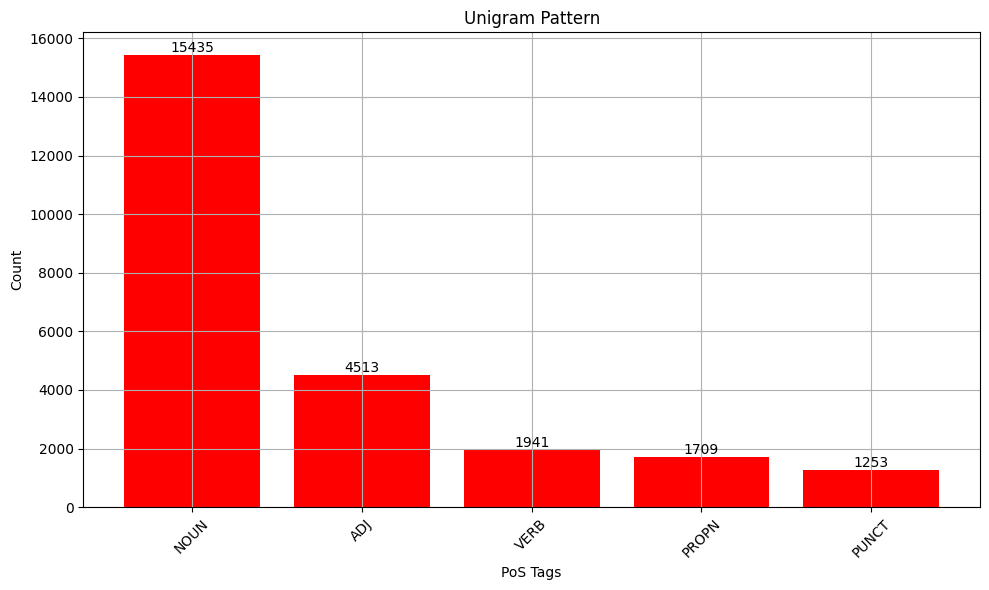

In [7]:
# Updating the provided code snippet to add a grid, write values on top of each bar, and change the bar color to green

# Updated POS tag counts dictionary with reduced items for better visualization
pos_tag_counts = {
    'NOUN': 15435,
    'ADJ': 4513,
    'VERB': 1941,
    'PROPN': 1709,
    'PUNCT': 1253
}

# Sorting the dictionary for a more organized graph
sorted_pos_tags = dict(sorted(pos_tag_counts.items(), key=lambda item: item[1], reverse=True))

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_pos_tags.keys(), sorted_pos_tags.values(), color='red')
plt.xlabel('PoS Tags')
plt.ylabel('Count')
plt.title('Unigram Pattern')
plt.xticks(rotation=45)
plt.grid(True)  # Adding a grid

# Adding the number on top of each bar with enhanced visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
